In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

**Exercise 4.3**

Exercise 4.3. [Purpose: To have you work through an example of the logic
presented in Section 4.2.1.2.] Determine the exact probability of drawing a 10 from
a shuffled pinochle deck. (In a pinochle deck, there are 48 cards. There are six values: 9,
10, Jack, Queen, King, Ace. There are two copies of each value in each of the standard
four suits: hearts, diamonds, clubs, spades.)
(A) What is the probability of getting a 10?
(B) What is the probability of getting a 10 or Jack?

(A) There are 8 cards of value 10. Hence the probability of getting a 10 is 8/48 = 0.1666...

(B) The values 10 and Jack are mutually exclusive, so we add their probabilities to get the
probability of the event that contains either 10 or Jack. Each has probability 8/48, so the
probability of 10 or Jack is 8/48 + 8/48 = 0.333...

**Exercise 4.4**

Exercise 4.4. [Purpose: To give you hands-on experience with a simple
probability density function, in R and in calculus, and to reemphasize that
density functions can have values larger than 1.] Consider a spinner with a [0,1]
scale on its circumference. Suppose that the spinner is slanted or magnetized or bent in
some way such that it is biased, and its probability density function is p(x) = 6x(1 − x)
over the interval x ∈ [0, 1].

(A) Adapt the program IntegralOfDensity.R to plot this density function and
approximate its integral. Comment your code. Be careful to consider values of x only in
the interval [0, 1]. Hint: You can omit the first couple of lines regarding meanval and
sdval , because those parameter values pertain only to the normal distribution. Then set
xlow=0 and xhigh=1 , and set dx to some small value.

(B) Derive the exact integral using calculus. Hint: See the example, Equation 4.7.

(C) Does this function satisfy Equation 4.3?

(D) From inspecting the graph, what is the maximal value of p(x)?

Integral is 1.0


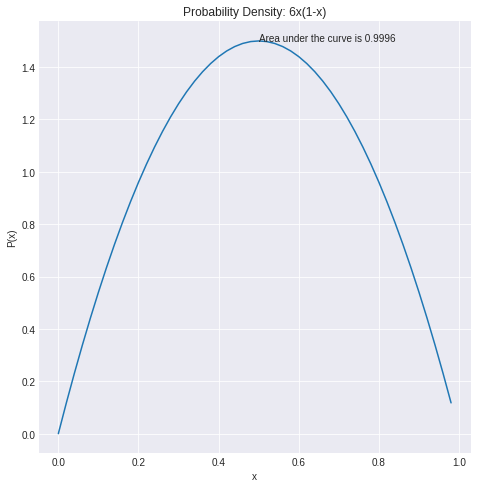

In [2]:
#  Exercise 4.4
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import quad

# A)
xlow = 0 # Specify low end of x-axis.
xhigh = 1 # Specify high end of x-axis.
dx = 0.02 # Specify interval width on x-axis
#Specify comb of points along the x axis:
x = np.arange(xlow, xhigh, dx)
# Compute y values, i.e., probability density at each value of x:
y = 6 * x * (1 - x)

plt.style.use('seaborn-darkgrid')
fig=plt.figure()
ax=fig.add_axes([0,0,1,1.5])
ax.plot(x, y)
ax.set_title('Probability Density: 6x(1-x)')
ax.set_xlabel("x")
ax.set_ylabel("P(x)")

# Approximate the integral as the sum of width * height for each interval. 
area = sum( dx * y ) # Numerical
ax.text(0.5, 1.5, "Area under the curve is {}".format(area))

# B)
def p(x):
    return 6 * x * (1 - x)

integral, err = quad(p,0,1) # Analytical
print(f"Integral is {integral}")


# C)
# Yes, the integral is 1.0, so the function satisfies Eqn 4.3.

# D)
# From the graph, it appears that the maximum density is 1.5 when x-0.5. Indeed, 6*0.5*(1-0.5) = 1.5.
plt.show()

**Exercise 4.5**

Exercise 4.5. [Purpose: To have you use a normal curve to describe
beliefs. It’s also handy to know the area under the normal curve between μ
and σ .]
(A) Adapt the code from IntegralOfDensity.R to determine (approximately) the
probability mass under the normal curve from x = μ − σ to x = μ + σ . Comment your
code. Hint: Just change xlow and xhigh appropriately, and change the text location so
that the area still appears within the plot.

(B) Now use the normal curve to describe the following belief. Suppose you believe
that women’s heights follow a bell-shaped distribution, centered at 162 cm with about
two-thirds of all women having heights between 147 and 177 cm. What should be the
μ and σ parameter values?

The description of beliefs indicates that the mean should be 162. Because 2/3 falls between 147 and 177, that
implies that mean– sigma= 147 and mean + sigma= 177,
hence sigma = 15.

**Exercise 4.6**

Exercise 4.6. [Purpose: Recognize and work with the fact that Equation 4.9
can be solved for the joint probability, which will be crucial for developing
Bayes’ theorem.] School children were surveyed regarding their favorite foods. Of the
total sample, 20% were 1st graders, 20% were 6th graders, and 60% were 11th graders.
For each grade, the following table shows the proportion of respondents that chose each
of three foods as their favorite:

|              |  Ice cream |  Fruit |  French fries |
|--------------|------------|--------|---------------|
| 1st graders  | 0.3        | 0.6    | 0.1           |
| 6th graders  | 0.6        | 0.3    | 0.1           |
| 11th graders | 0.3        | 0.1    | 0.6           |

From that information, construct a table of joint probabilities of grade and favorite
food. Also, say whether grade and favorite food are independent or not, and how you
ascertained the answer. Hint: You are given p(grade) and p(food|grade). You need to
determine p(grade,food).


remember that
p(food|grade) = p(food,grade)/p(grade),
which implies that
p(food,grade) = p(food|grade) * p(grade).


Hence, the table of joint probabilities is

|              |  Ice cream   |    Fruit     |  French fries |
|--------------|--------------|--------------|---------------|
| 1st graders  | 0.3*0.2=0.6  | 0.6*0.2=0.12 | 0.1*0.2=0.2   |
| 6th graders  | 0.6*0.2=0.12 | 0.3*0.2=0.6  | 0.1*0.2=0.2   |      
| 11th graders | 0.3*0.6=0.18 | 0.1*0.6=0.06 | 0.6*0.6=0.36  |

The sum of the joint probabilities across the nine cells is 1.0, as it should be. Grade and food are not independent. This can be proven by exhibiting any cell for which
p(food,grade) does not equal p(food) * p(grade). Consider Ice cream in 1st grade: p(Ice cream,
1st grade) is 0.06, while p(Ice cream) * p(1st grade) = 0.36 * 0.20 = 0.072.

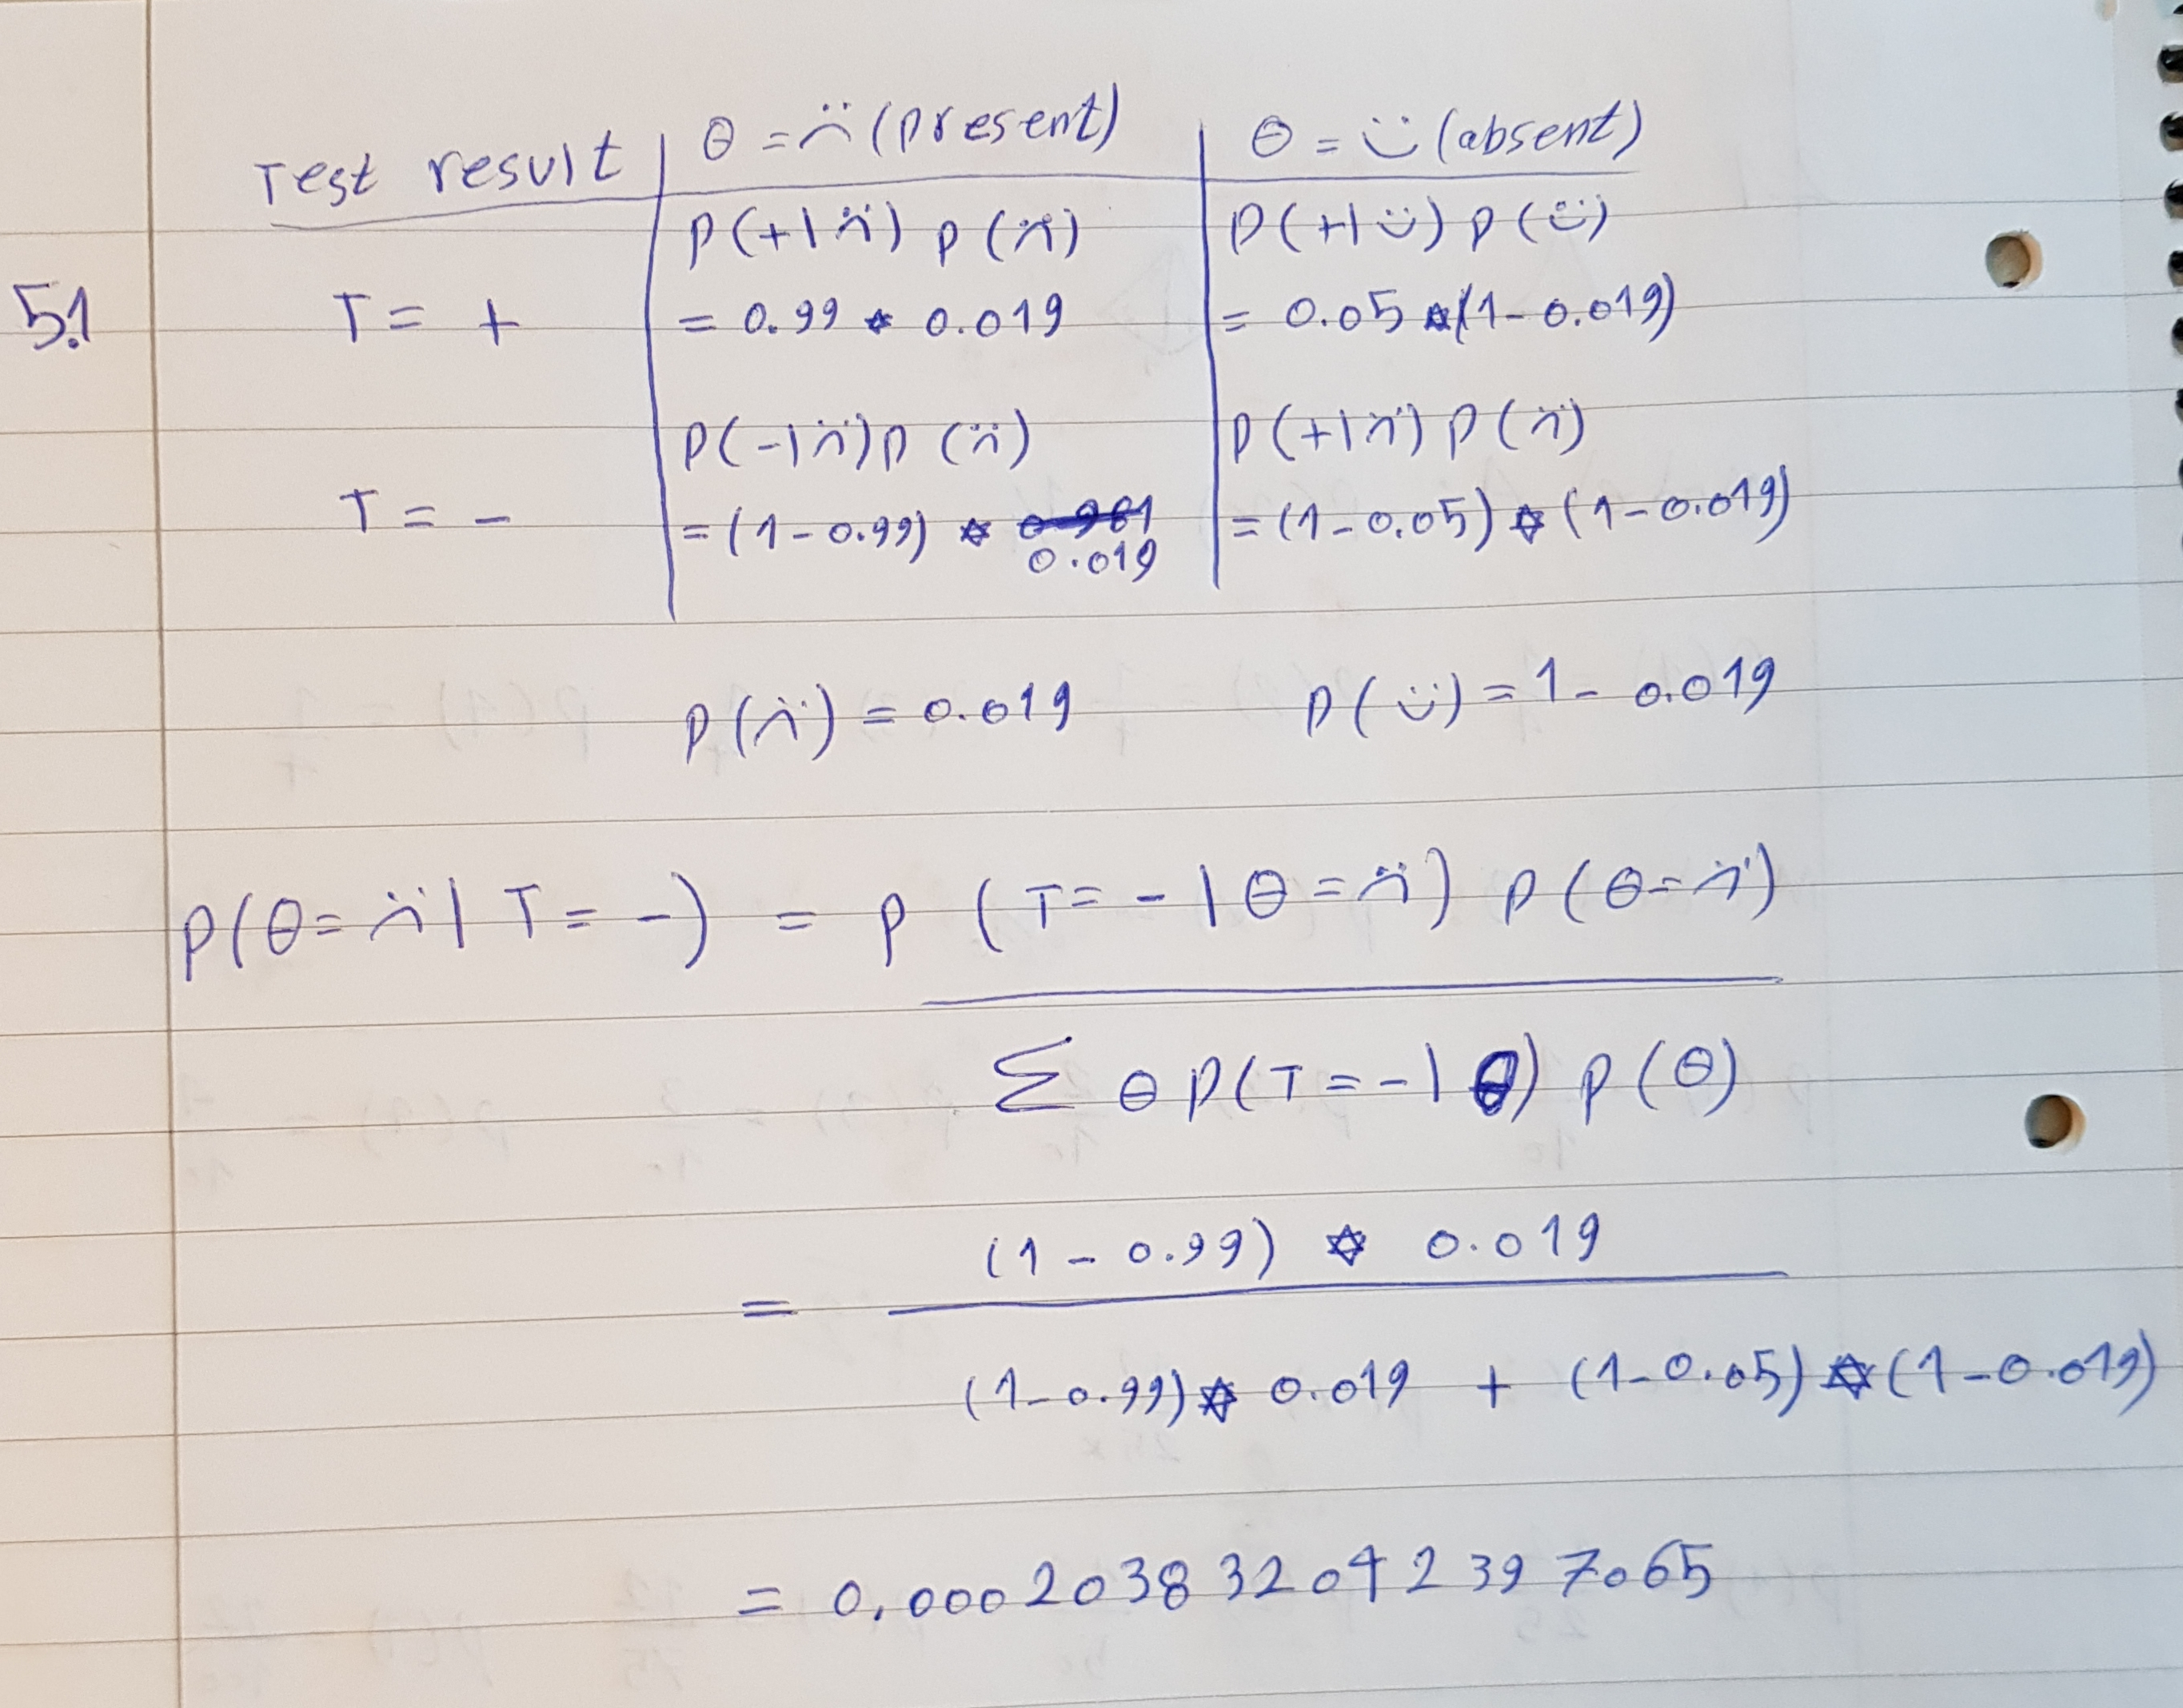

In [3]:
numi = (1 - 0.99) * 0.019
demi = numi + (1 - 0.05) * (1 - 0.019)
res = numi / demi
print(res)

0.000203832042397065
